![*The river Seine at La Grande-Jatte*](images\session_004\seurat_001_banner.jpg)

Today, we'll cover the following content:

1. Nuts & bolts of data visualization - types of data and types of plots
2. Pandas built-in visualization methods: quick & dirty plots
3. Matplotlib = customizability
4. Other visualization options (Seaborn, Plotly)

But first, let's remind ourselves of the last session's topics.

## 1. Recap of the previous session

![*Race in Grandcamp*](images\session_004\seurat_002_banner.jpg)

Last week, we started by learning about functions.

This should look familiar:

In [118]:
def sum_exponents(a, b, exponent = 2):
    return a ** exponent + b ** exponent

In [119]:
sum_exponents(5, 7)

74

We should now be able to create our own functions, and we'll use this knowledge today!

Also, we got familiar with Pandas - Python's most popular library for tabular data manipulation.

We talked about importing this library, importing `.csv` files, different methods for getting an overview of them, working with rows and columns... Importantly, we've also covered the `pd.DataFrame.groupby()` method, and we've discussed how it works with aggregate measures!

We used the famous `titanic` dataset for our explorations, and we'll continue using it today :)

Now, let's get right into the matter: Data visualisation!

## 2. A quick reminder

![*The Seine at Courbevoie*](images\session_004\seurat_003_banner.jpg)

**Why do we even use visualizations?**

Because they help us understand the relationship between different variables in our dataset.

**What types of plots are there?**

A better question to start with is: What types of data are there?

## 3. Pandas built-in visualizations

![*Bathers at Asnières*](images\session_004\seurat_004_banner.jpg)

Pandas gives us some pretty handy methods for quick-and-dirty visualizations.

These are useful when we just want to get a quick overview of the data for ourseleves, or when we're trying things out.

In such cases, it wouldn't make much sense to invest a lot of time into building nicer and more informative plots.

But, this isn't the recommended option for sharing plots with others. It's not very customizable - we'd need more time to make these plots publishable than we'd need to build them "ground-up".

Matplotlib is unavoidable, however - Pandas is running on top of it.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt ## This is how we import it, by convention

plt.rcParams["figure.dpi"] = 150 ## Increasing all plots' resolution

## Importing the data
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [30]:
df.head() ## Just a quick reminder :)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Enough talking, time for plotting!

### Histogram

<AxesSubplot:title={'center':"Histogram of Titanic passengers' ages"}, ylabel='Frequency'>

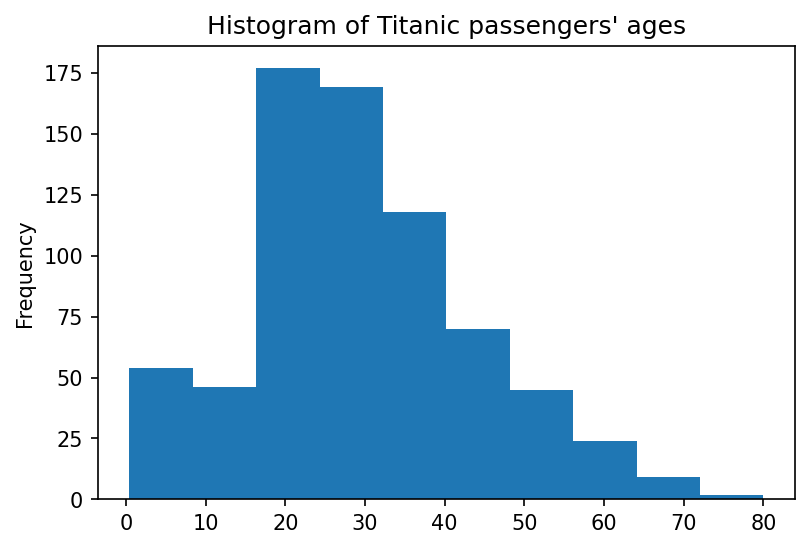

In [104]:
df["Age"].plot(kind = "hist", title = "Histogram of Titanic passengers' ages")

Now that's what I call easy!

- What isn't that easy, however, is drawing boundaries for each of the bins! 
- We can acheive it easily with Matplotlib!

What else can we do?

Take a look at our data, and think which relationships might be worth exploring visually :)

### Scatterplot

<AxesSubplot:xlabel='Age', ylabel='Fare'>

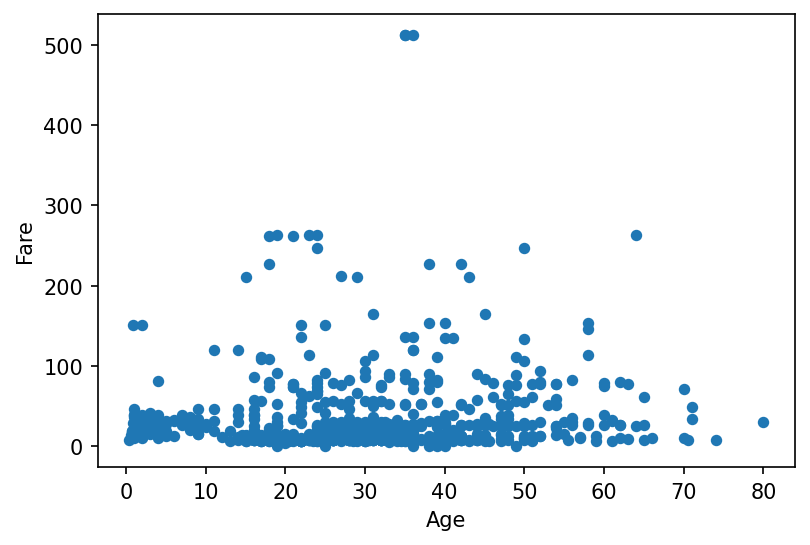

In [43]:
df.plot.scatter(x = "Age", y = "Fare")

Here's the dirty part. There's so much overlap! Not so easy to fix...

Let's see a few more examples.

### Bar plots

In [33]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [105]:
type(df["Sex"].value_counts()) ## Just a reminder :)

pandas.core.series.Series

<AxesSubplot:>

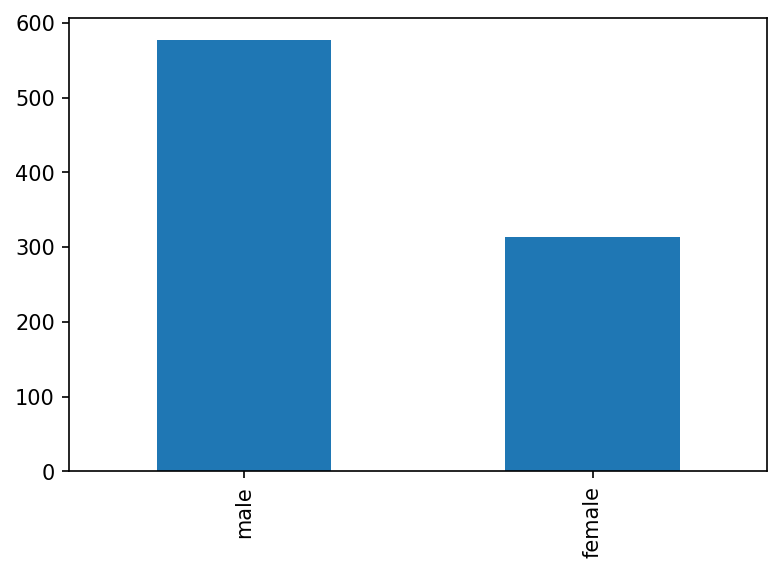

In [34]:
df["Sex"].value_counts().plot(kind = "bar")

In [35]:
df.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

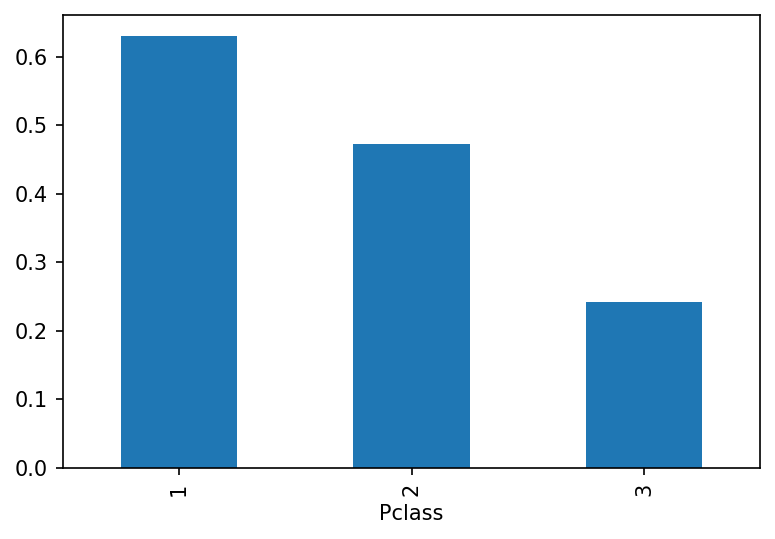

In [36]:
df.groupby("Pclass")["Survived"].mean().plot(kind = "bar")

### Histograms with groups

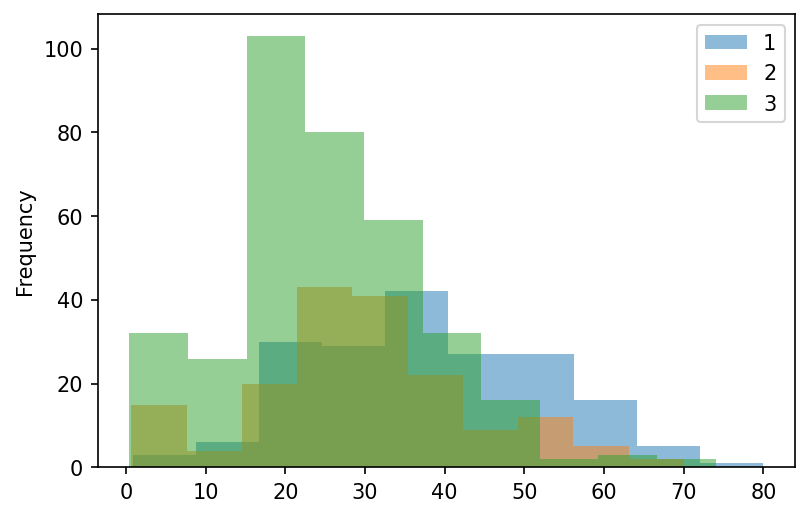

In [103]:
df.groupby("Pclass")["Age"].plot(kind = "hist", alpha = 0.5)
    
plt.legend()

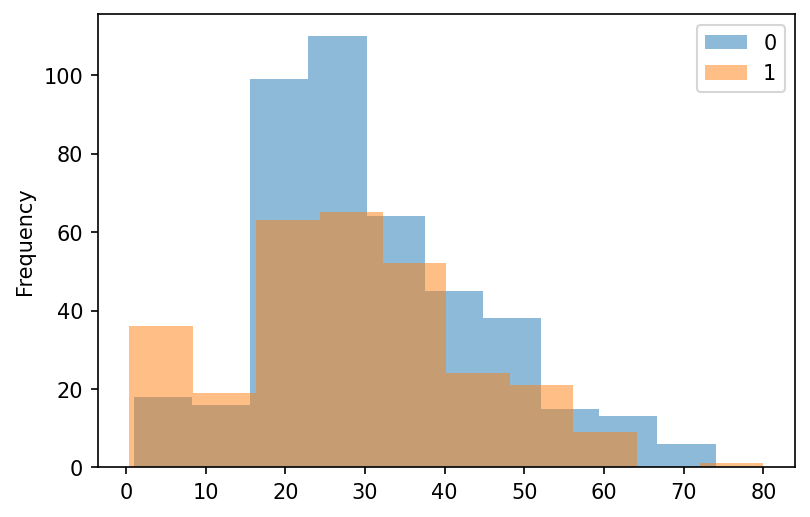

In [38]:
df.groupby("Survived")["Age"].plot(kind = "hist", alpha = 0.5)
plt.legend()

## 4. Matplotlib

![*Circus Sideshow*](images\session_004\saurat_005_banner.jpg)

Now that we've seen how simple it is to use Pandas for some ridimentary data visualization, let's dig a bit more deeply, and explore Matplotlib.

It offers us much greater flexibility and customizability.

As many visualisation systems, it comes with an own philosophy of a sort.

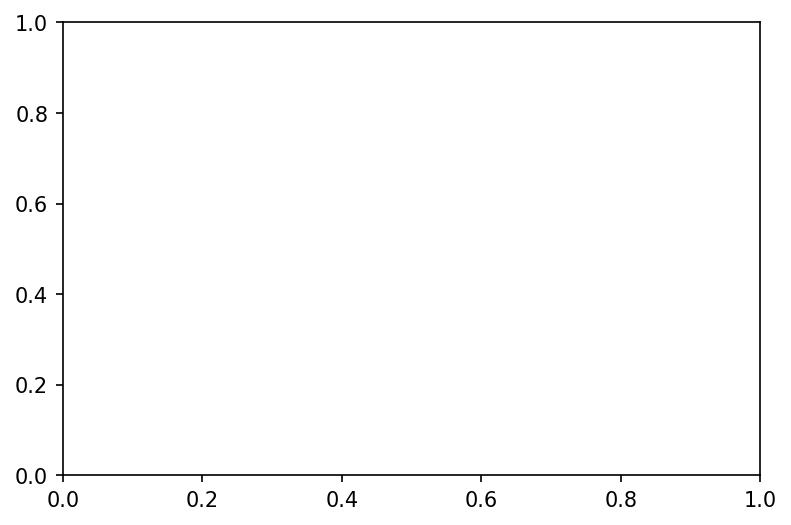

In [55]:
## Let's pretend we haven't imported matplotlib already :)

import matplotlib.pyplot as plt 
plt.rcParams["figure.dpi"] = 150

fig, ax = plt.subplots(facecolor = 'white')
plt.show()

Wait, what have we just done?

(<Figure size 900x600 with 1 Axes>, <AxesSubplot:>)

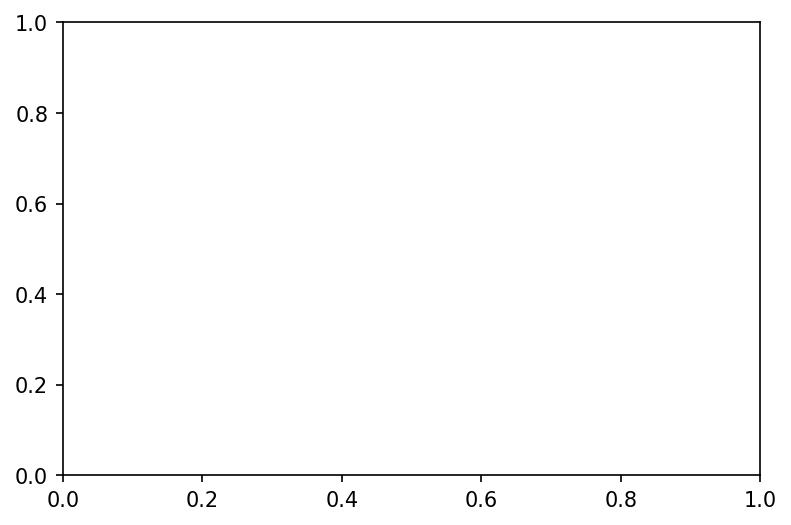

In [111]:
plt.subplots()

`facecolor = 'white'` isn't really necessary, btw.

I use it to fight off cell-phone dark mode!

### Line plots

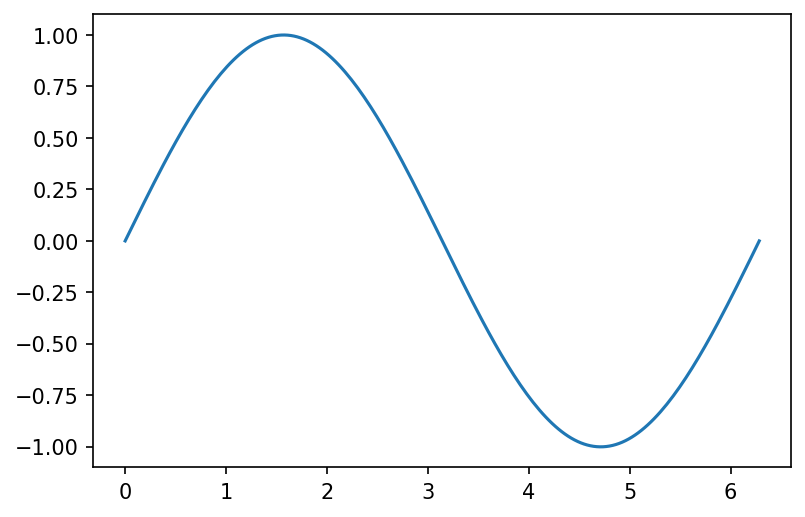

In [65]:
## Let's generate some data for plotting

import numpy as np

num = np.linspace(0, 2 * np.pi, 200)
sin = np.sin(num)

fig, ax = plt.subplots(facecolor = 'white')
ax.plot(num, sin)
plt.show()

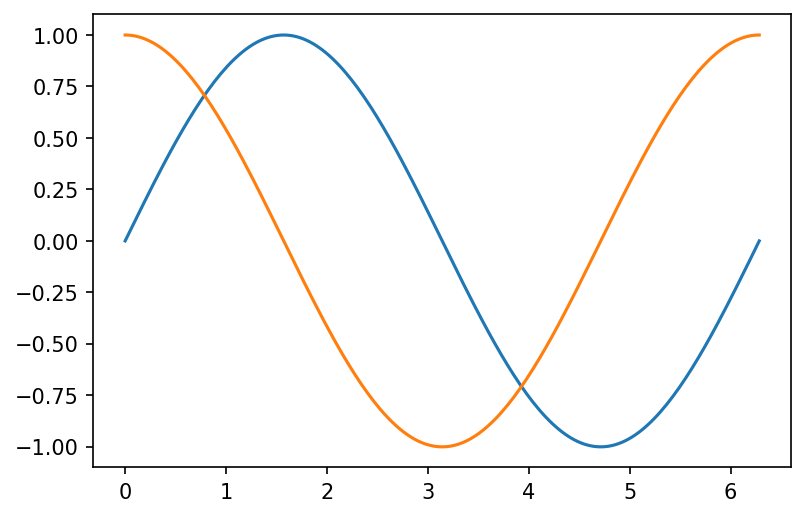

In [66]:
num = np.linspace(0, 2 * np.pi, 200)
sin = np.sin(num)
cos = np.cos(num)

fig, ax = plt.subplots(facecolor = 'white')
ax.plot(num, sin) ## Adding sin
ax.plot(num, cos) ## Adding cos, on the same fig!

plt.show()

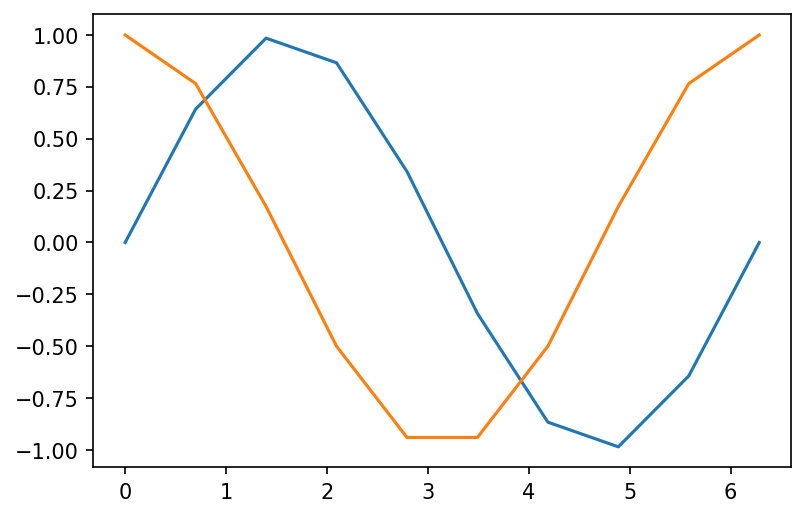

In [67]:
num = np.linspace(0, 2 * np.pi, 10) ## Let's reduce the number of our data points
sin = np.sin(num)
cos = np.cos(num)

fig, ax = plt.subplots(facecolor = 'white')
ax.plot(num, sin)
ax.plot(num, cos)

plt.show()

Our lines aren't so smooth anymore.

Let's play with them a bit!

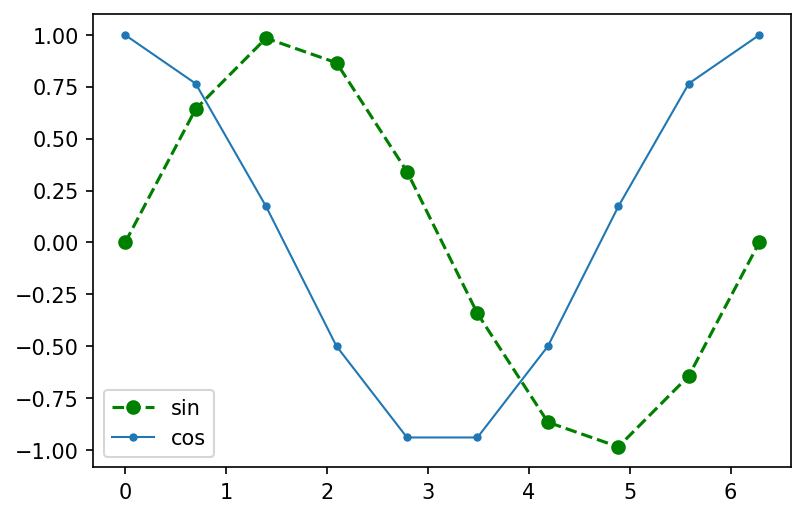

In [84]:
num = np.linspace(0, 2 * np.pi, 10)
sin = np.sin(num)
cos = np.cos(num)

fig, ax = plt.subplots(facecolor = 'white')

ax.plot(num, sin, 
        marker = "o", 
        linestyle = "--", 
        color = "g",
        label = "sin")

ax.plot(num, cos, 
        marker = "o", 
        markersize = 3, 
        linewidth = 1, 
        label = "cos")

plt.legend()
plt.show()

<https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html>

🏠 What other types of markers are there?<br>
🏠 How can we define colors to be used in our plots?

### Scatterplots

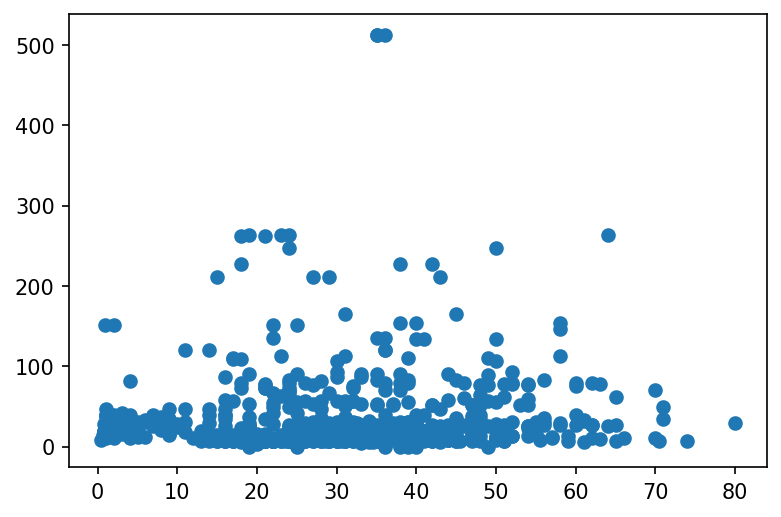

In [86]:
## Let's return to our Titanic data now

fig, ax = plt.subplots(facecolor = 'white')

ax.scatter(x = df["Age"], y = df["Fare"])

plt.show()

Not bad, but we do have a few problems here...

What's on the X-axis, and what's on the Y-axis? No one could tell except us (and we might also forget in a day or tow). **We need axis labels**, in other words.

A title wouldn't hurt either!


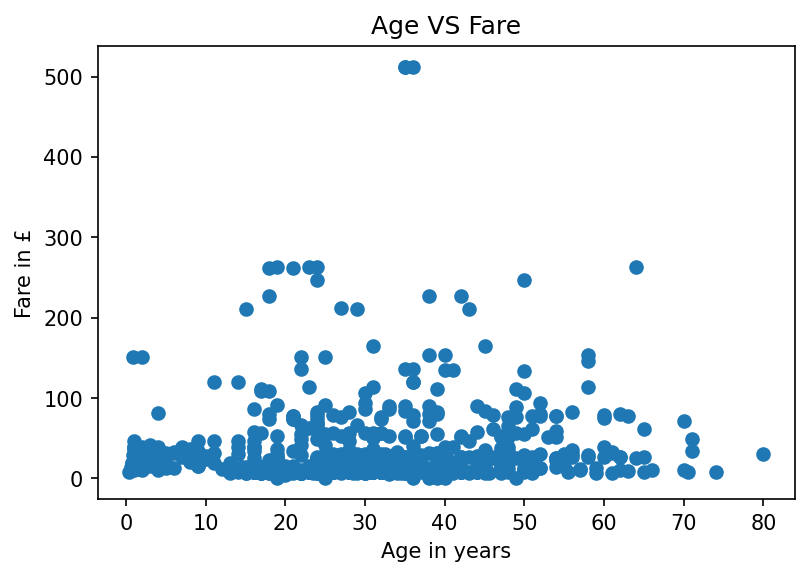

In [101]:
fig, ax = plt.subplots(facecolor = 'white')

ax.scatter(x = df["Age"], y = df["Fare"])

ax.set_xlabel("Age in years")
ax.set_ylabel("Fare in £")

ax.set_title("Age VS Fare")

plt.show()

Better already.

But what's going on with that overlap?? Let's get rid of it.

❔ Any ideas how we could do it?

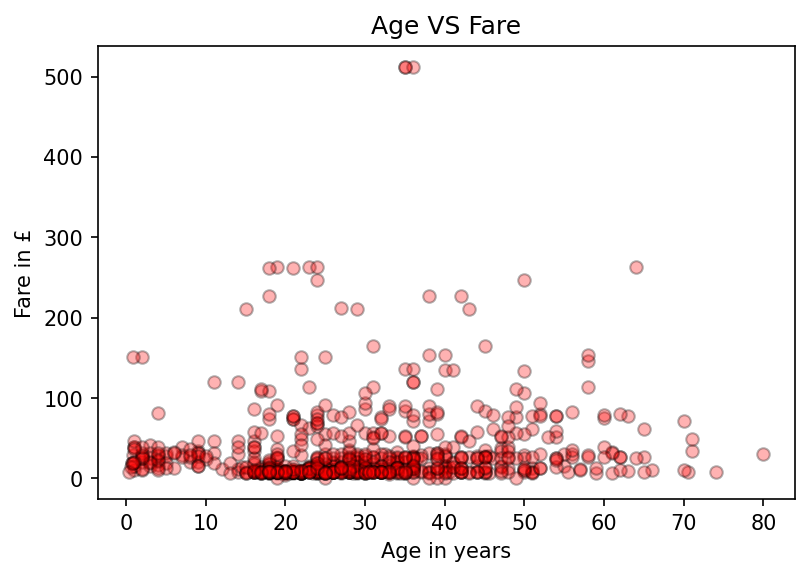

In [102]:
fig, ax = plt.subplots(facecolor = 'white')

ax.scatter(x = df["Age"], y = df["Fare"], 
           c = "red", 
           alpha = 0.3, 
           edgecolors = "black")

## Let's not forget our labels and our title

ax.set_xlabel("Age in years")
ax.set_ylabel("Fare in £")

ax.set_title("Age VS Fare")

## Let's see what we've made

plt.show()

<https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html>

<https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib>

What if we want to add another "dimension" to our graph? 

For example, we'd like to distinguish between men and women, or those who survived and those who didn't...

This will have to wait for Seaborn!

Before that, however, there's one more thing we should discuss in Matplotlib:

### Multiple plots per figure

## Other options for plotting

![*A Sunday Afternoon on the Island of La Grande Jatte*](images\session_004\seurat_006_banner.jpg)

### a) seaborn

### b) plotly

## Homework

![*Harbour at Port-en-Bessin at High Tide*](images\session_004\seurat_007_banner.jpg)

## Additional Readings

![*Seascape at Port-en-Bessin, Normandy*](images\session_004\seurat_008_banner.jpg)

- <https://pandas.pydata.org/docs/user_guide/visualization.html>
- <https://matplotlib.org>
  - <https://matplotlib.org/cheatsheets/>

---